# 🧠 Théorie des LLM - Large Language Models

## 🎯 Objectifs
- **Comprendre** ce qu'est vraiment un LLM
- **Maîtriser** les concepts clés : tokens, contexte, attention
- **Découvrir** les capacités émergentes
- **Identifier** les limitations et biais
- **Préparer** l'utilisation pratique

---

## 🤔 Qu'est-ce qu'un LLM ?

### Définition Simple
Un **Large Language Model** est un modèle d'IA qui :
1. A été **entraîné sur des milliards de mots** (internet, livres, etc.)
2. **Prédit le mot suivant** dans une séquence
3. **Comprend et génère** du langage naturel
4. **Développe des capacités** non programmées explicitement

### Analogie Simple 🧩
Imaginez un **super-autocomplete** qui :
- A lu tous les textes d'internet
- Comprend le contexte et le sens
- Peut continuer n'importe quelle phrase de façon intelligente
- Sait raisonner, coder, traduire, créer...

**Mais attention** : Il ne "pense" pas vraiment, il prédit statistiquement !

## 📦 Installation et Setup

In [1]:
# Installation des bibliothèques nécessaires
!pip install matplotlib seaborn plotly pandas numpy tiktoken transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 16.0 MB/s eta 0:00:00


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

print("✅ Imports terminés !")

✅ Imports terminés !


## 🔢 Concept #1 : Les Tokens

### Qu'est-ce qu'un Token ?
Les LLM ne "voient" pas les lettres, ils voient des **tokens** :
- 🔤 **Mots** : "chat", "maison"
- 🧩 **Parties de mots** : "anti-", "-tion"
- 🔣 **Caractères spéciaux** : "!", "?", "@"
- 🔢 **Nombres** : "2024", "3.14"

### Pourquoi C'est Important ?
- 💰 **Coût** : Facturé au token
- ⚡ **Vitesse** : Plus de tokens = plus lent
- 📏 **Limite** : Contexte limité en nombre de tokens

In [3]:
# Simulation simple de tokenisation
def simple_tokenizer(text):
    """
    Tokenisation simplifiée pour démonstration
    (Les vrais tokenizers sont plus sophistiqués)
    """
    import re
    
    # Diviser par mots et ponctuation
    tokens = re.findall(r'\w+|[^\w\s]', text.lower())
    
    # Simuler la subdivision de mots longs
    final_tokens = []
    for token in tokens:
        if len(token) > 8:  # Mots très longs
            # Diviser en chunks
            for i in range(0, len(token), 4):
                final_tokens.append(token[i:i+4])
        else:
            final_tokens.append(token)
    
    return final_tokens

# Exemples de tokenisation
textes_exemples = [
    "Bonjour, comment allez-vous ?",
    "Les modèles de langage sont révolutionnaires !",
    "L'intelligence artificielle transforme notre société.",
    "GPT-4 coûte 30$/million de tokens.",
    "Supercalifragilistique est un mot compliqué."
]

print("🔢 EXEMPLES DE TOKENISATION")
print("=" * 50)

for i, texte in enumerate(textes_exemples, 1):
    tokens = simple_tokenizer(texte)
    nb_chars = len(texte)
    nb_tokens = len(tokens)
    ratio = nb_chars / nb_tokens
    
    print(f"\n📝 Exemple {i}:")
    print(f"Texte: '{texte}'")
    print(f"Tokens: {tokens}")
    print(f"📊 {nb_chars} caractères → {nb_tokens} tokens (ratio: {ratio:.1f})")

print("\n💡 Observations:")
print("  • 1 token ≈ 3-4 caractères en français")
print("  • Mots longs = plusieurs tokens")
print("  • Ponctuation = tokens séparés")
print("  • Mots rares = plus de tokens")

🔢 EXEMPLES DE TOKENISATION

📝 Exemple 1:
Texte: 'Bonjour, comment allez-vous ?'
Tokens: ['bonjour', ',', 'comment', 'allez', '-', 'vous', '?']
📊 29 caractères → 7 tokens (ratio: 4.1)

📝 Exemple 2:
Texte: 'Les modèles de langage sont révolutionnaires !'
Tokens: ['les', 'modèles', 'de', 'langage', 'sont', 'révo', 'luti', 'onna', 'ires', '!']
📊 46 caractères → 10 tokens (ratio: 4.6)

📝 Exemple 3:
Texte: 'L'intelligence artificielle transforme notre société.'
Tokens: ['l', "'", 'inte', 'llig', 'ence', 'arti', 'fici', 'elle', 'tran', 'sfor', 'me', 'notre', 'société', '.']
📊 53 caractères → 14 tokens (ratio: 3.8)

📝 Exemple 4:
Texte: 'GPT-4 coûte 30$/million de tokens.'
Tokens: ['gpt', '-', '4', 'coûte', '30', '$', '/', 'million', 'de', 'tokens', '.']
📊 34 caractères → 11 tokens (ratio: 3.1)

📝 Exemple 5:
Texte: 'Supercalifragilistique est un mot compliqué.'
Tokens: ['supe', 'rcal', 'ifra', 'gili', 'stiq', 'ue', 'est', 'un', 'mot', 'comp', 'liqu', 'é', '.']
📊 44 caractères → 13 tokens (ratio

In [4]:
# Visualisation de l'impact des tokens sur les coûts
def calculer_cout_par_modele(nb_tokens):
    """
    Calcule le coût selon le nombre de tokens pour différents modèles
    """
    prix_par_1m_tokens = {
        'GPT-4': 30.0,
        'GPT-3.5 Turbo': 1.0,
        'Claude 3 Opus': 15.0,
        'Claude 3 Sonnet': 3.0,
        'Gemini Pro': 2.5
    }
    
    couts = {}
    for modele, prix in prix_par_1m_tokens.items():
        cout = (nb_tokens / 1_000_000) * prix
        couts[modele] = cout
    
    return couts

# Simuler différents volumes d'usage
volumes_tokens = [1000, 10000, 100000, 1000000]  # 1K à 1M tokens
volume_labels = ['1K tokens\n(~3 pages)', '10K tokens\n(~30 pages)', 
                '100K tokens\n(~300 pages)', '1M tokens\n(~3000 pages)']

# Préparer les données pour visualisation
data_cout = []
for i, volume in enumerate(volumes_tokens):
    couts = calculer_cout_par_modele(volume)
    for modele, cout in couts.items():
        data_cout.append({
            'Volume': volume_labels[i],
            'Modèle': modele,
            'Coût ($)': cout
        })

df_cout = pd.DataFrame(data_cout)

# Graphique des coûts
fig = px.bar(df_cout, x='Volume', y='Coût ($)', color='Modèle',
             title='💰 Impact du Nombre de Tokens sur les Coûts',
             barmode='group')

fig.update_layout(height=500, yaxis_type="log")
fig.show()

print("💡 Points clés:")
print("  📈 Coût proportionnel au nombre de tokens")
print("  🎯 Optimiser les prompts = réduire les coûts")
print("  ⚖️ Choisir le bon modèle selon le volume")
print("  📊 Surveiller la consommation en production")

💡 Points clés:
  📈 Coût proportionnel au nombre de tokens
  🎯 Optimiser les prompts = réduire les coûts
  ⚖️ Choisir le bon modèle selon le volume
  📊 Surveiller la consommation en production


## 🧠 Concept #2 : Le Contexte et l'Attention

### Le Contexte
Le **contexte** est tout ce que le LLM "voit" en même temps :
- 📝 **Votre prompt** (instructions)
- 💬 **Historique de conversation**
- 📄 **Documents fournis**
- 🧠 **Réponse en cours de génération**

### Taille du Contexte
Chaque modèle a une **limite de contexte** :
- 📏 **GPT-3.5** : 16K tokens (~50 pages)
- 📏 **GPT-4** : 128K tokens (~400 pages)
- 📏 **Claude 3** : 200K tokens (~600 pages)
- 📏 **Gemini Pro** : 1M tokens (~3000 pages)

### L'Attention : Comment le LLM "Regarde"
Le mécanisme d'**attention** permet au LLM de :
- 🔍 **Se concentrer** sur les parties importantes
- 🔗 **Relier** des informations distantes
- 📊 **Pondérer** l'importance de chaque token

In [5]:
# Simulation du mécanisme d'attention
def simuler_attention(phrase, mot_cible):
    """
    Simule les scores d'attention d'un LLM
    (Version très simplifiée pour illustration)
    """
    mots = phrase.split()
    scores_attention = []
    
    for mot in mots:
        # Simulation basique basée sur la similarité
        if mot.lower() == mot_cible.lower():
            score = 1.0  # Attention maximale sur le mot lui-même
        elif any(c in mot.lower() for c in mot_cible.lower()):
            score = 0.6  # Attention modérée sur mots similaires
        elif len(mot) > 5:  # Mots longs souvent importants
            score = 0.4
        elif mot.lower() in ['le', 'la', 'de', 'et', 'à', 'un', 'une', 'du', 'des']:
            score = 0.1  # Attention faible sur mots courants
        else:
            score = 0.3  # Attention moyenne
        
        scores_attention.append(score)
    
    return mots, scores_attention

# Exemples d'attention
exemples_attention = [
    ("Le chat noir mange une souris dans le jardin", "chat"),
    ("L'intelligence artificielle transforme notre société moderne", "intelligence"),
    ("Les modèles de langage utilisent l'attention pour comprendre", "attention"),
    ("GPT-4 génère du texte en prédisant le prochain token", "GPT-4")
]

print("🔍 SIMULATION DU MÉCANISME D'ATTENTION")
print("=" * 60)

for i, (phrase, mot_cible) in enumerate(exemples_attention, 1):
    mots, scores = simuler_attention(phrase, mot_cible)
    
    print(f"\n📝 Exemple {i}: Focus sur '{mot_cible}'")
    print(f"Phrase: {phrase}")
    print("Attention:")
    
    for mot, score in zip(mots, scores):
        # Visualisation avec des barres
        barre = "█" * int(score * 10)
        print(f"  {mot:12s} {'█' * int(score * 10):10s} {score:.1f}")

print("\n💡 Dans un vrai LLM:")
print("  🧠 Attention calculée par réseaux de neurones")
print("  🔄 Plusieurs 'têtes' d'attention en parallèle")
print("  📊 Scores dynamiques selon le contexte")
print("  🎯 Permet de comprendre les relations complexes")

🔍 SIMULATION DU MÉCANISME D'ATTENTION

📝 Exemple 1: Focus sur 'chat'
Phrase: Le chat noir mange une souris dans le jardin
Attention:
  Le           █          0.1
  chat         ██████████ 1.0
  noir         ███        0.3
  mange        ██████     0.6
  une          █          0.1
  souris       ████       0.4
  dans         ██████     0.6
  le           █          0.1
  jardin       ██████     0.6

📝 Exemple 2: Focus sur 'intelligence'
Phrase: L'intelligence artificielle transforme notre société moderne
Attention:
  L'intelligence ██████     0.6
  artificielle ██████     0.6
  transforme   ██████     0.6
  notre        ██████     0.6
  société      ██████     0.6
  moderne      ██████     0.6

📝 Exemple 3: Focus sur 'attention'
Phrase: Les modèles de langage utilisent l'attention pour comprendre
Attention:
  Les          ██████     0.6
  modèles      ██████     0.6
  de           ██████     0.6
  langage      ██████     0.6
  utilisent    ██████     0.6
  l'attention  ██████     0.6


In [6]:
# Visualisation interactive de l'attention
phrase_demo = "L'intelligence artificielle révolutionne notre société grâce aux modèles de langage"
mots_demo, scores_demo = simuler_attention(phrase_demo, "intelligence")

# Créer une heatmap d'attention
fig = go.Figure(data=go.Heatmap(
    z=[scores_demo],
    x=mots_demo,
    y=['Attention'],
    colorscale='Reds',
    showscale=True,
    colorbar=dict(title="Score d'Attention")
))

fig.update_layout(
    title="🔍 Visualisation du Mécanisme d'Attention",
    xaxis_title="Mots de la phrase",
    height=300
)

fig.show()

# Graphique en barres pour une autre vue
fig2 = px.bar(
    x=mots_demo, y=scores_demo,
    title="📊 Scores d'Attention par Mot",
    labels={'x': 'Mots', 'y': 'Score d\'Attention'},
    color=scores_demo,
    color_continuous_scale='Reds'
)

fig2.update_layout(height=400, showlegend=False)
fig2.show()

print("🎯 Interprétation:")
print("  🔴 Rouge foncé = Attention élevée")
print("  🔴 Rouge clair = Attention modérée")
print("  ⚪ Blanc = Attention faible")
print("  💡 Le LLM 'regarde' surtout les mots importants")

🎯 Interprétation:
  🔴 Rouge foncé = Attention élevée
  🔴 Rouge clair = Attention modérée
  ⚪ Blanc = Attention faible
  💡 Le LLM 'regarde' surtout les mots importants


## 🌡️ Concept #3 : La Température et la Créativité

### Qu'est-ce que la Température ?
La **température** contrôle la **créativité** du LLM :
- 🧊 **Température = 0** : Déterministe, toujours la même réponse
- ❄️ **Température = 0.3** : Peu créatif, cohérent
- 🌡️ **Température = 0.7** : Équilibré créativité/cohérence
- 🔥 **Température = 1.0** : Créatif, parfois incohérent
- 🌋 **Température = 2.0** : Très créatif, souvent chaotique

### Comment Ça Fonctionne ?
Le LLM calcule des **probabilités** pour chaque mot possible :
- 📊 **Température faible** : Choisit presque toujours le mot le plus probable
- 📊 **Température élevée** : Peut choisir des mots moins probables

### Quand Utiliser Quoi ?
- 🧊 **T=0** : Code, maths, traduction
- ❄️ **T=0.3** : FAQ, documentation technique
- 🌡️ **T=0.7** : Rédaction, chatbot général
- 🔥 **T=1.0** : Créativité, brainstorming, fiction

In [7]:
# Simulation de l'effet de la température
import random

def simuler_temperature(mots_possibles, probabilities, temperature):
    """
    Simule l'effet de la température sur le choix des mots
    """
    if temperature == 0:
        # Toujours le mot le plus probable
        return mots_possibles[np.argmax(probabilities)]
    
    # Appliquer la température
    adjusted_probs = np.array(probabilities) ** (1/temperature)
    adjusted_probs = adjusted_probs / np.sum(adjusted_probs)
    
    # Choix selon les nouvelles probabilités
    return np.random.choice(mots_possibles, p=adjusted_probs)

# Exemple : compléter "Le chat est très"
mots_possibles = ['mignon', 'intelligent', 'rapide', 'mystérieux', 'élégant', 'joueur', 'curieux']
probabilities_base = [0.4, 0.2, 0.15, 0.1, 0.08, 0.05, 0.02]  # "mignon" le plus probable

temperatures = [0, 0.3, 0.7, 1.0, 1.5]
nb_simulations = 10

print("🌡️ SIMULATION DE L'EFFET DE LA TEMPÉRATURE")
print("=" * 60)
print("Phrase à compléter: 'Le chat est très ___'")
print(f"Mots possibles: {mots_possibles}")
print(f"Probabilités de base: {[f'{p:.2f}' for p in probabilities_base]}")
print()

for temp in temperatures:
    print(f"🌡️ Température = {temp}")
    
    # Simuler plusieurs générations
    resultats = []
    for _ in range(nb_simulations):
        mot_choisi = simuler_temperature(mots_possibles, probabilities_base, temp)
        resultats.append(mot_choisi)
    
    # Compter les occurrences
    from collections import Counter
    compteur = Counter(resultats)
    
    print(f"  Résultats sur {nb_simulations} générations:")
    for mot, count in compteur.most_common():
        pourcentage = (count / nb_simulations) * 100
        barre = "█" * int(pourcentage / 10)
        print(f"    {mot:12s}: {barre:10s} {pourcentage:5.1f}%")
    print()

print("💡 Observations:")
print("  🧊 T=0: Toujours le même mot (déterministe)")
print("  ❄️ T=0.3: Peu de variation, mots probables")
print("  🌡️ T=0.7: Bon équilibre créativité/cohérence")
print("  🔥 T≥1.0: Plus de variation, mots moins probables")

🌡️ SIMULATION DE L'EFFET DE LA TEMPÉRATURE
Phrase à compléter: 'Le chat est très ___'
Mots possibles: ['mignon', 'intelligent', 'rapide', 'mystérieux', 'élégant', 'joueur', 'curieux']
Probabilités de base: ['0.40', '0.20', '0.15', '0.10', '0.08', '0.05', '0.02']

🌡️ Température = 0
  Résultats sur 10 générations:
    mignon      : ██████████ 100.0%

🌡️ Température = 0.3
  Résultats sur 10 générations:
    mignon      : ████████    80.0%
    intelligent : ██          20.0%

🌡️ Température = 0.7
  Résultats sur 10 générations:
    mignon      : ██████      60.0%
    intelligent : ██          20.0%
    mystérieux  : ██          20.0%

🌡️ Température = 1.0
  Résultats sur 10 générations:
    mignon      : ████        40.0%
    mystérieux  : ██          20.0%
    joueur      : ██          20.0%
    rapide      : █           10.0%
    élégant     : █           10.0%

🌡️ Température = 1.5
  Résultats sur 10 générations:
    intelligent : ██          20.0%
    rapide      : ██          20.0%
 

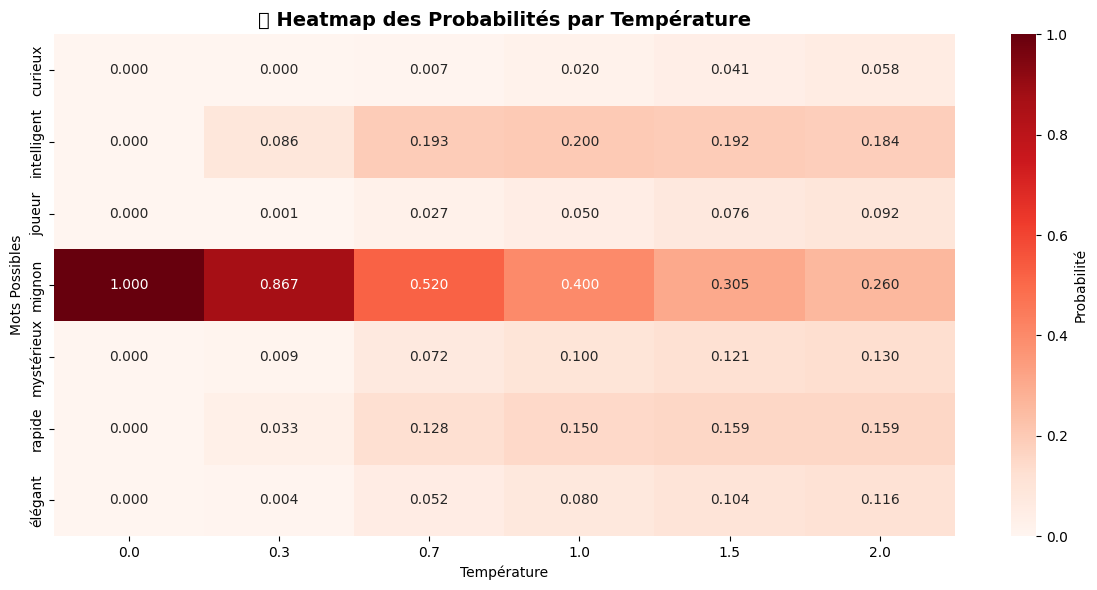

📊 Guide de lecture:
  🔴 Rouge foncé = Probabilité élevée
  🔴 Rouge clair = Probabilité modérée
  ⚪ Blanc = Probabilité faible
  📈 Plus la température augmente, plus les probabilités s'équilibrent


In [8]:
# Visualisation de l'effet de la température sur les probabilités
def calculer_probs_temperature(probs_base, temperature):
    """Calcule les probabilités ajustées selon la température"""
    if temperature == 0:
        # Toute la probabilité sur le max
        result = np.zeros_like(probs_base)
        result[np.argmax(probs_base)] = 1.0
        return result
    
    adjusted = np.array(probs_base) ** (1/temperature)
    return adjusted / np.sum(adjusted)

# Calculer pour différentes températures
temps_viz = [0, 0.3, 0.7, 1.0, 1.5, 2.0]
data_temp = []

for temp in temps_viz:
    probs_ajustees = calculer_probs_temperature(probabilities_base, temp)
    for i, (mot, prob) in enumerate(zip(mots_possibles, probs_ajustees)):
        data_temp.append({
            'Température': temp,
            'Mot': mot,
            'Probabilité': prob,
            'Rang': i
        })

df_temp = pd.DataFrame(data_temp)

# Graphique interactif
fig = px.line(df_temp, x='Température', y='Probabilité', color='Mot',
              title='🌡️ Évolution des Probabilités selon la Température',
              markers=True)

fig.update_layout(height=500)
fig.show()

# Heatmap des probabilités
pivot_temp = df_temp.pivot(index='Mot', columns='Température', values='Probabilité')

plt.figure(figsize=(12, 6))
sns.heatmap(pivot_temp, annot=True, fmt='.3f', cmap='Reds', 
            cbar_kws={'label': 'Probabilité'})
plt.title('🌡️ Heatmap des Probabilités par Température', fontsize=14, fontweight='bold')
plt.ylabel('Mots Possibles')
plt.xlabel('Température')
plt.tight_layout()
plt.show()

print("📊 Guide de lecture:")
print("  🔴 Rouge foncé = Probabilité élevée")
print("  🔴 Rouge clair = Probabilité modérée")
print("  ⚪ Blanc = Probabilité faible")
print("  📈 Plus la température augmente, plus les probabilités s'équilibrent")

## 🌟 Concept #4 : Les Capacités Émergentes

### Qu'est-ce qu'une Capacité Émergente ?
Une capacité qui **apparaît spontanément** quand le modèle devient assez grand, sans avoir été explicitement programmée.

### Exemples de Capacités Émergentes :

#### 🧮 Raisonnement Arithmétique
- **Petits modèles** : Peuvent additionner
- **Grands modèles** : Peuvent résoudre des problèmes mathématiques complexes

#### 💻 Programmation
- **Petits modèles** : Reconnaissent du code
- **Grands modèles** : Écrivent, debuggent, expliquent du code

#### 🧠 Raisonnement Logique
- **Petits modèles** : Suivent des instructions simples
- **Grands modèles** : Raisonnement par étapes, déduction

#### 🎭 Few-Shot Learning
- **Capacité à apprendre** de nouveaux concepts avec juste quelques exemples
- **S'adapter** à de nouveaux domaines sans ré-entraînement

### 📏 Scaling Laws
Plus un modèle a de **paramètres** et d'**entraînement**, plus il développe de capacités :
- 📊 **GPT-1** (117M param) : Génération basique
- 📊 **GPT-2** (1.5B param) : Génération cohérente
- 📊 **GPT-3** (175B param) : Few-shot learning
- 📊 **GPT-4** (1.7T param estimé) : Raisonnement avancé

In [9]:
# Données sur l'évolution des capacités
modeles_evolution = {
    'Modèle': ['GPT-1', 'GPT-2', 'GPT-3', 'GPT-4', 'Future GPT-5*'],
    'Année': [2018, 2019, 2020, 2023, 2025],
    'Paramètres (B)': [0.117, 1.5, 175, 1700, 10000],  # Milliards
    'Données (TB)': [5, 40, 570, 13000, 50000],  # Téraoctets estimés
    'Score MMLU (%)': [30, 35, 43, 86, 95],  # Estimation
    'Capacités': [
        'Génération basique',
        'Cohérence améliorée',
        'Few-shot learning',
        'Raisonnement complexe',
        'AGI naissante*'
    ]
}

df_evolution = pd.DataFrame(modeles_evolution)

# Graphique de l'évolution
fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=('Nombre de Paramètres', 'Données d\'Entraînement', 
                   'Performance MMLU', 'Évolution des Capacités'),
    specs=[[{"secondary_y": False}, {"secondary_y": False}],
           [{"secondary_y": False}, {"type": "table"}]]
)

# Paramètres (échelle log)
fig.add_trace(
    go.Scatter(x=df_evolution['Année'], y=df_evolution['Paramètres (B)'],
               mode='lines+markers', name='Paramètres',
               line=dict(color='blue', width=3),
               marker=dict(size=10)),
    row=1, col=1
)

# Données d'entraînement
fig.add_trace(
    go.Scatter(x=df_evolution['Année'], y=df_evolution['Données (TB)'],
               mode='lines+markers', name='Données TB',
               line=dict(color='green', width=3),
               marker=dict(size=10)),
    row=1, col=2
)

# Performance MMLU
fig.add_trace(
    go.Scatter(x=df_evolution['Année'], y=df_evolution['Score MMLU (%)'],
               mode='lines+markers', name='MMLU %',
               line=dict(color='red', width=3),
               marker=dict(size=10)),
    row=2, col=1
)

# Tableau des capacités
fig.add_trace(
    go.Table(
        header=dict(values=['Modèle', 'Capacités Principales'],
                   fill_color='lightblue'),
        cells=dict(values=[df_evolution['Modèle'], df_evolution['Capacités']],
                  fill_color='white')),
    row=2, col=2
)

# Mettre les échelles en log pour les grandes valeurs
fig.update_yaxes(type="log", row=1, col=1)
fig.update_yaxes(type="log", row=1, col=2)

fig.update_layout(
    title="📈 Évolution des LLM : Plus Grand = Plus Intelligent",
    height=700,
    showlegend=False
)

fig.show()

print("🌟 Lois d'Échelle (Scaling Laws):")
print("  📊 Performance ∝ log(Paramètres)")
print("  📊 Performance ∝ log(Données d'entraînement)")
print("  📊 Performance ∝ log(Compute utilisé)")
print("\n💡 Implications:")
print("  🚀 Plus gros = plus intelligent (jusqu'à un certain point)")
print("  💰 Coût exponentiel pour amélioration linéaire")
print("  🎯 Nouvelles capacités émergent à certains seuils")
print("  ⚠️ Limites physiques et économiques à venir")

🌟 Lois d'Échelle (Scaling Laws):
  📊 Performance ∝ log(Paramètres)
  📊 Performance ∝ log(Données d'entraînement)
  📊 Performance ∝ log(Compute utilisé)

💡 Implications:
  🚀 Plus gros = plus intelligent (jusqu'à un certain point)
  💰 Coût exponentiel pour amélioration linéaire
  🎯 Nouvelles capacités émergent à certains seuils
  ⚠️ Limites physiques et économiques à venir


## ⚠️ Concept #5 : Limitations et Biais

### Limitations Techniques

#### 🔄 Hallucinations
- **Définition** : Génération d'informations fausses avec confiance
- **Cause** : Le modèle "invente" pour compléter
- **Exemple** : Inventer des références bibliographiques

#### 📅 Coupure de Connaissances
- **Problème** : Pas d'info après la date d'entraînement
- **GPT-4** : Connaissances jusqu'à avril 2023
- **Solution** : RAG, recherche web, mise à jour

#### 🧮 Arithmétique et Logique
- **Faiblesse** : Erreurs sur calculs complexes
- **Cause** : Pas une calculatrice, mais prédicteur de texte
- **Solution** : Outils externes, vérification

### Biais et Problèmes Éthiques

#### 📊 Biais des Données
- **Origine** : Biais présents dans les données d'entraînement
- **Types** : Sexisme, racisme, stéréotypes culturels
- **Impact** : Discrimination dans les applications

#### 🎭 Anthropomorphisme
- **Problème** : Tendance à attribuer des émotions/intentions
- **Réalité** : Pas de conscience, juste statistiques
- **Danger** : Confiance excessive, manipulation possible

### Comment Mitiger ces Risques ?

1. **🔍 Vérification** : Toujours vérifier les faits importants
2. **🎯 Prompts clairs** : Instructions précises et contexte
3. **🛡️ Guardrails** : Systèmes de sécurité et filtres
4. **👥 Humain dans la boucle** : Supervision humaine critique
5. **📊 Tests de biais** : Évaluation régulière sur cas edge

In [10]:
# Démonstration des limitations avec des exemples
limitations_exemples = {
    'Type de Limitation': [
        'Hallucination',
        'Connaissances obsolètes', 
        'Erreur arithmétique',
        'Biais culturel',
        'Logique défaillante'
    ],
    'Exemple Problématique': [
        'Inventer des citations d\'articles inexistants',
        'Ignorer les événements post-2023',
        'Erreur sur 8743 × 2847 = ?',
        'Associer certains métiers à un genre',
        'Contradictions dans un raisonnement long'
    ],
    'Impact Potentiel': [
        'Désinformation, perte de crédibilité',
        'Décisions basées sur infos périmées',
        'Erreurs financières ou techniques',
        'Discrimination, renforcement stéréotypes',
        'Mauvaises décisions stratégiques'
    ],
    'Solution/Mitigation': [
        'Vérification sources, fact-checking',
        'RAG, recherche web temps réel',
        'Calculatrice externe, vérification',
        'Tests de biais, prompts inclusifs',
        'Décomposition en étapes, validation'
    ],
    'Gravité (1-5)': [4, 3, 2, 5, 3]
}

df_limitations = pd.DataFrame(limitations_exemples)

# Visualisation des niveaux de gravité
fig = px.bar(df_limitations, 
             x='Type de Limitation', 
             y='Gravité (1-5)',
             color='Gravité (1-5)',
             color_continuous_scale='Reds',
             title='⚠️ Gravité des Différentes Limitations des LLM')

fig.update_layout(height=400)
fig.show()

# Tableau détaillé
print("⚠️ GUIDE DES LIMITATIONS ET SOLUTIONS")
print("=" * 80)

for _, row in df_limitations.iterrows():
    print(f"\n🚨 {row['Type de Limitation']} (Gravité: {row['Gravité (1-5)']}/5)")
    print(f"   Exemple: {row['Exemple Problématique']}")
    print(f"   Impact: {row['Impact Potentiel']}")
    print(f"   ✅ Solution: {row['Solution/Mitigation']}")

print("\n💡 Bonnes Pratiques Générales:")
print("  🔍 Ne jamais faire confiance aveuglément")
print("  📝 Documenter les limitations connues")
print("  🧪 Tester sur des cas edge régulièrement")
print("  👥 Maintenir une supervision humaine")
print("  📊 Monitorer les performances en continu")
print("  🛡️ Implémenter des guardrails appropriés")

⚠️ GUIDE DES LIMITATIONS ET SOLUTIONS

🚨 Hallucination (Gravité: 4/5)
   Exemple: Inventer des citations d'articles inexistants
   Impact: Désinformation, perte de crédibilité
   ✅ Solution: Vérification sources, fact-checking

🚨 Connaissances obsolètes (Gravité: 3/5)
   Exemple: Ignorer les événements post-2023
   Impact: Décisions basées sur infos périmées
   ✅ Solution: RAG, recherche web temps réel

🚨 Erreur arithmétique (Gravité: 2/5)
   Exemple: Erreur sur 8743 × 2847 = ?
   Impact: Erreurs financières ou techniques
   ✅ Solution: Calculatrice externe, vérification

🚨 Biais culturel (Gravité: 5/5)
   Exemple: Associer certains métiers à un genre
   Impact: Discrimination, renforcement stéréotypes
   ✅ Solution: Tests de biais, prompts inclusifs

🚨 Logique défaillante (Gravité: 3/5)
   Exemple: Contradictions dans un raisonnement long
   Impact: Mauvaises décisions stratégiques
   ✅ Solution: Décomposition en étapes, validation

💡 Bonnes Pratiques Générales:
  🔍 Ne jamais faire co

## 🎯 Synthèse et Prochaines Étapes

### ✅ Ce que Vous Avez Appris

#### 🧠 Concepts Fondamentaux
- **Tokens** : Unité de base des LLM (coût, vitesse, limite)
- **Contexte** : Fenêtre d'attention limitée mais cruciale
- **Attention** : Mécanisme pour se concentrer sur l'important
- **Température** : Contrôle créativité vs cohérence

#### 🌟 Capacités Avancées
- **Émergence** : Nouvelles capacités avec la taille
- **Few-shot** : Apprentissage avec peu d'exemples
- **Raisonnement** : Logique et déduction complexes
- **Multimodalité** : Texte + images + code

#### ⚠️ Limitations Critiques
- **Hallucinations** : Invention d'informations fausses
- **Biais** : Reproduction des biais des données
- **Obsolescence** : Connaissances datées
- **Logique** : Erreurs sur calculs/raisonnements longs

### 🚀 Prochaines Étapes

#### 📚 Dans ce Module
1. **Notebook 2** : Utilisation pratique des APIs
2. **Notebook 3** : Optimisation des paramètres
3. **Notebook 4** : Vision de l'architecture finale

#### 🎯 Modules Suivants
- **Module 10** : Prompt Engineering (optimiser les instructions)
- **Module 11** : Fine-tuning (personnaliser les modèles)
- **Module 12** : RAG (connecter à vos données)
- **Module 13** : LangChain (framework de développement)
- **Module 14** : Agents et CrewAI (systèmes autonomes)

### 💡 Points Clés à Retenir

1. **🎯 LLM = Prédicteur sophistiqué** (pas une vraie intelligence)
2. **💰 Coût proportionnel aux tokens** (optimiser = économiser)
3. **🌡️ Température = créativité** (adapter selon l'usage)
4. **⚠️ Toujours vérifier** les informations critiques
5. **🔧 Outils complémentaires** nécessaires pour combler les lacunes

---

**🎉 Félicitations ! Vous comprenez maintenant les fondements théoriques des LLM.**

**👉 Prêt pour la pratique ? Passons aux APIs dans le notebook suivant !**